# Tutorial: Evaluating algorithmic fairness with the optimal bandwidth of the MADD

We show an example of a use case with some data and a random model.

In [1]:
from maddlib import evaluation
from maddlib import optimal_bandwidth
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

## 0. Preliminaries

### 0.1. Get data

In [2]:
# Load train and test sets
X_train = pd.read_csv("./data/X_train.csv")
X_test = pd.read_csv("./data/X_test.csv")
y_train = pd.read_csv("./data/y_train.csv")
y_test = pd.read_csv("./data/y_test.csv")

### 0.2. Train a model

In [3]:
# Training phase: Fit a classifier
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=0)

### 0.3. Get the predicted probabilities

In [4]:
# Testing phase: Get the predicted probabilities of positive predictions
y_pp = clf.predict_proba(X_test)[:, 1] 

## 1. Optimal bandwidth search

### 1.1. Compute the optimal bandwidth interval

In [5]:
# Choose the sensitive feature (or could be two distinct groups also)
sensitive_feature = "disability"

# Generate N values of h
N = 500
h = optimal_bandwidth.generate_bandwidths(N)

# Compute the MAADs according to the h
madd = [evaluation.MADD(hi, X_test, y_pp, sensitive_feature) for hi in h]

# Search for the optimal bandwidth interval
interval = optimal_bandwidth.find_stable_interval(h, madd, min_nb_points=10)
interval

{'min interval length': 0.05,
 'indexes': (472, 487),
 'h interval': '[0.037, 0.091]',
 'min madd std': 0.038170420392280184,
 'madd average': 0.32648835838491014}

### 1.2. Plot the interval

In [6]:
# Get the number of individuals in each group
n0 = len(X_test[X_test[sensitive_feature] == 0])
n1 = len(X_test[X_test[sensitive_feature] == 1])

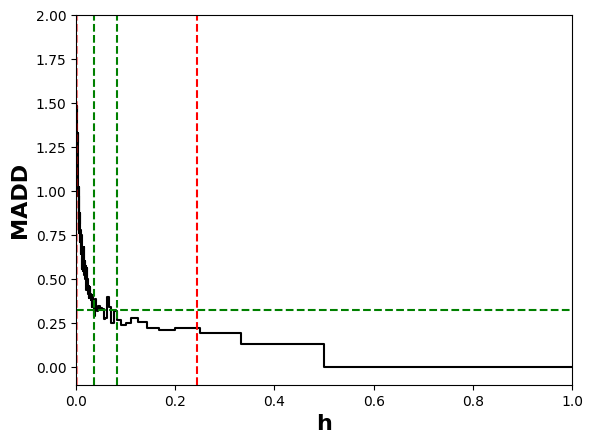

In [7]:
# Plot the entire search space
optimal_bandwidth.plot_stable_interval(h, madd, indexes=interval["indexes"], n0=n0, n1=n1,
                                       legend=False, show_order=True)

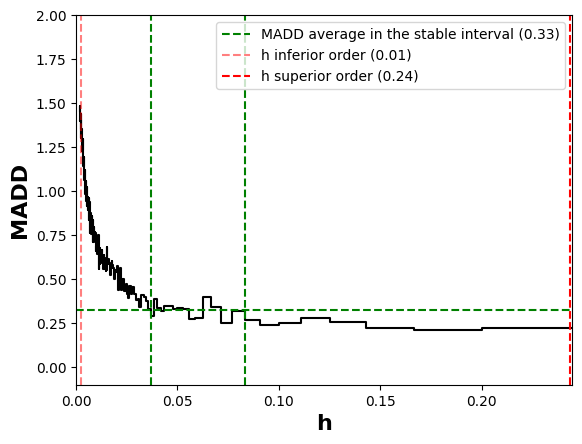

In [8]:
# Plot the zone of interest
optimal_bandwidth.plot_stable_interval(h, madd, indexes=interval["indexes"], n0=n0, n1=n1,
                                       zoom="sup order", legend=True, show_order=True)

In [9]:
interval["madd average"], evaluation.MADD("auto", X_test, y_pp, sensitive_feature, min_nb_points=10)

(0.32648835838491014, 0.32648835838491014)